In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
np.set_printoptions(threshold=sys.maxsize)
import os
import subprocess
from pylab import rcParams
import matplotlib as pl
rcParams['figure.figsize']=15,8
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
np.set_printoptions(threshold=sys.maxsize)
pl.rcParams['ytick.minor.visible'] =True
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['font.size'] = '32'
pl.rcParams['legend.fontsize'] = '10'
pl.rcParams['legend.borderaxespad'] = '1.9'
#pl.rcParams['legend.numpoints'] = '1'
pl.rcParams['figure.titlesize'] = 'medium'
pl.rcParams['figure.titlesize'] = 'medium'
pl.rcParams['xtick.major.size'] = '8'
pl.rcParams['xtick.minor.size'] = '5'
pl.rcParams['xtick.major.width'] = '2'
pl.rcParams['xtick.minor.width'] = '1'
pl.rcParams['ytick.major.size'] = '10'
pl.rcParams['ytick.minor.size'] = '6'
pl.rcParams['ytick.major.width'] = '2'
pl.rcParams['ytick.minor.width'] = '1'
pl.rcParams['xtick.direction'] = 'in'
pl.rcParams['ytick.direction'] = 'in'
pl.rcParams['axes.labelpad'] = '10.0'
pl.rcParams['lines.dashed_pattern']=3.0, 1.4
#pl.rcParams['axes.formatter.limits']=-10,10
pl.rcParams['lines.dotted_pattern']= 1.0, 0.7
pl.rcParams['xtick.labelsize'] = '15'
pl.rcParams['ytick.labelsize'] = '15'
pl.rcParams['axes.labelsize'] = '19'
pl.rcParams['axes.labelsize'] = '19'
pl.rcParams['xtick.major.pad']='10'
pl.rcParams['xtick.minor.pad']='10'
from scipy.stats import truncnorm
#pl.rcParams['hatch.color'] = 'black'
pl.rc('axes', linewidth=2)

from matplotlib.patches import Rectangle
#pl.rcParams['text.usetex'] = True
#pl.rcParams['text.latex.unicode'] = True
#pl.rcParams['font.family'] = 'serif'
#pl.rcParams['font.serif']='Times New Roman'

#plt.subplots(nrows=2, ncols=1, figsize=(6,6))
import pylab
from matplotlib import rc
from pylab import rcParams
rcParams['figure.figsize']=30,36
#Defining BB function
from matplotlib import gridspec
gs = gridspec.GridSpec(1, 1)
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('axes', linewidth=2.5)
# rcParams['figure.figsize']=32,25

In [2]:
time_trig=np.arange(0,90000,1)
n= (time_trig.size)

In [3]:
current_directory=os.getcwd()
x=subprocess.call('for d in ./*.*_*.*_*.* ; do echo $d; done > directories.txt', shell=True)

current_directory=os.getcwd()

In [4]:

save=[]
ra_dec_num=[]
fileo=open("directories.txt", "r")
num_lines=[]
for i in range(0,90000,1):
    n=0
    fileo=open("directories.txt", "r")
    for lines in fileo:
        num_lines=num_lines+1
        #num_lines.append(num_lines)
        lines=lines.split("./")
        
        lines=lines[1].split("\n")
        #print (lines[0])
        ra=lines[0].split("_")[0]
        dec=lines[0].split("_")[1]
        trigger_time=lines[0].split("_")[2]
        #print (ra,dec)
        final_directory = os.path.join(current_directory, lines[0])
        data=np.genfromtxt(final_directory+'/ValidIntervals.txt')
        mjd_start=data[:,0]
        mjd_end=data[:,1]

        for k in range(0,mjd_start.size):
            if (time_trig[i]<=mjd_end[k] and time_trig[i]>=mjd_start[k]):
                n=n+1
                   
    info= np.array([i,n])
    save.append(info)

save=np.array(save)
np.savetxt(current_directory+'/save.txt',save)
print (num_lines)


38784.0
Okay
2340.0
3839.0
Okay
3876.0
4504.0
Okay
8067.0
10225.0
Okay
13814.0
15942.0
Okay
19868.0
21636.0
Okay
25867.0
27365.0
Okay
31833.0
33061.0
Okay
37789.0
38778.0
Number of times coverage was greater than 70% 8


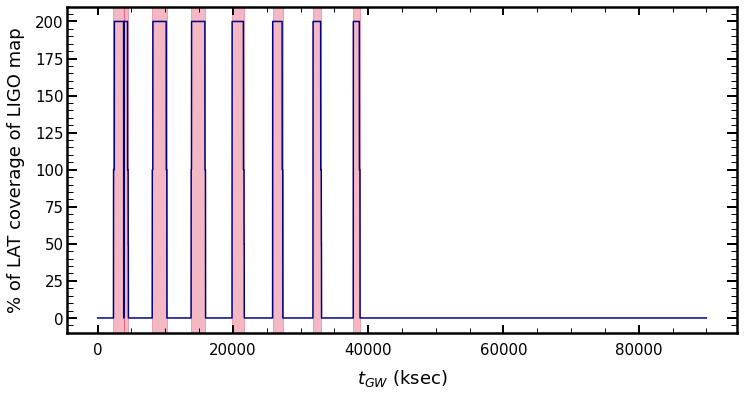

In [5]:
data=np.genfromtxt(current_directory+'/save.txt')
time=data[:,0]
coverage=data[:,1]
total_list_num=num_lines

from pylab import rcParams
import matplotlib as pl
rcParams['figure.figsize']=12,6
plt.plot(time,(coverage/total_list_num)*100,color='navy')

#plt.yscale('log')
plt.ylabel('% of LAT coverage of LIGO map',size=18)
plt.xlabel(r'$t_{GW}$ (ksec)',size=18)
#plt.savefig(current_directory+'/coverage_plot.pdf')


coverage=(coverage/total_list_num)*100
#print (coverage)
required_time_periods=[]
for i in range (coverage.size):
    if (coverage[i] >=70):
        required_time_periods.append(time[i])

#appending a value just to get the right intervals later. THe last value in the array doesn't mean anything        
required_time_periods.append(required_time_periods[-1]+5)        
print (required_time_periods[-1])
required_time_periods=np.array(required_time_periods)

n=5000
save=[]
met_start=[]
met_end=[]
p=0
for i in range (0,required_time_periods.size-1):
    #print (i)
    if ((required_time_periods[i+1] - required_time_periods[i])==1):
        save.append(required_time_periods[i])
    else:
        p=p+1
        print ('Okay')
        save=np.array(save)
        #print (save)
        print ('================================')
        print (min(save))
        print (max(save))
        met_start.append(min(save))
        met_end.append(max(save))
        print ('================================')
        plt.axvspan(max(save),min(save),color='crimson',alpha=0.3)
        save=[]

met_start=np.array(met_start)
met_end=np.array(met_end)

zipped=np.array([met_start,met_end]).T
np.savetxt(current_directory+'/valid_time_bnNONE.txt',zipped)
plt.savefig(current_directory+'/coverage_plot.pdf')
print ('Number of times coverage was greater than 70%', p)